<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/transformers_hugging_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 26th October
#  Bhai Dooj
# Hugging face dataset from csv file:
# Ref: https://huggingface.co/docs/datasets/v1.1.1/loading_datasets.html#from-local-files
# From pandas dataframe:
#  https://huggingface.co/docs/datasets/v1.1.1/loading_datasets.html#from-a-pandas-dataframe
# Process datasets:
# https://huggingface.co/docs/datasets/process

In [1]:
# 1.0 Install transformers and datasets:

!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 4.5 MB/s 
     |████████████████████████████████| 441 kB 41.3 MB/s 
     |████████████████████████████████| 163 kB 18.4 MB/s 
     |████████████████████████████████| 7.6 MB 40.8 MB/s 
     |████████████████████████████████| 115 kB 41.8 MB/s 
     |████████████████████████████████| 212 kB 25.2 MB/s 
     |████████████████████████████████| 127 kB 24.7 MB/s 
     |████████████████████████████████| 115 kB 41.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [2]:
# Call libraries:
# 1.1 Hugging Face related:

from transformers import pipeline
from datasets import load_dataset
from datasets import Dataset

# 1.2 General
import numpy as np
import pandas as pd
import re


# 1.3 To display youtube videos
from IPython.display import YouTubeVideo


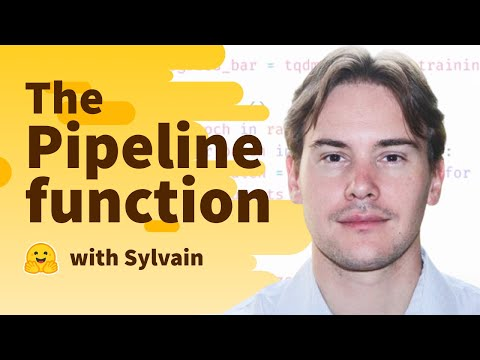

In [ ]:
# 1.3 Display Transformers, Quick Start video:

YouTubeVideo('tiZFewofSLM')

## What is a pipeline?<br>


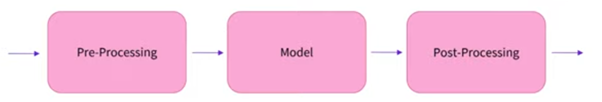

## Sentiment analysis
Create an object to perform sentiment analysis<br>
Details about Pipeline class are [here](https://huggingface.co/docs/transformers/main_classes/pipelines).

In [3]:
# 2.0 Instantiate 'pipeline' for sentiment-anaysis
#     Once instantiated, 'classifier' object
#     can be used for sentiment analysis:

classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [4]:
# 2.1 Discover sentiment of a sentence:
#      emoji inserted in the sentece is just an image,
#       inserted within the sentence. emoji acts just
#        like a printed letter: 
#         😎 😀 😭 🤣 😂 🙂 😇 😠 🤐 😒

classifier("We are very happy to show you the 🤗 Transformers library.")

[{'label': 'POSITIVE', 'score': 0.9997795224189758}]

In [5]:
# 2.2 Find entiments of multiple sentences.
#     Collect all the sentences in a list:

lu = [
      "We are very happy to show you the 🤗 Transformers library.",
      "We hope you don't hate it."
      ]

# 2.3 Get results for all at once:

results = classifier(lu)

In [6]:
# 2.4 results is a list of dictionaries:

results

[{'label': 'POSITIVE', 'score': 0.9997795224189758},
 {'label': 'NEGATIVE', 'score': 0.5308645963668823}]

In [7]:
# 2.5 Get results for each:
for result in results:
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

label: POSITIVE, with score: 0.9998
label: NEGATIVE, with score: 0.5309


## Mount gdrive

In [8]:
# 3.0

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## Read drugs dataset from gdrive
Drugs Review dataset at [UCI repo](https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29)

In [9]:
# 4.0 Path to folder in gdrive where data files are: 

pathToFolder = "/gdrive/MyDrive/Colab_data_files/drugs_raw/"

In [10]:
# 4.1 One of the files (train):

drug = "drugsComTrain_raw.tsv"

In [11]:
# 4.2 Read dataset in pandas:

data = pd.read_csv(pathToFolder + drug, sep = "\t")

## Explore and clean data

In [12]:
# 5.0 Our data:

data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [13]:
# 5.1 Shape:
 
data.shape   # (161297, 7)

(161297, 7)

In [14]:
# 5.2 Rename unnamed to patientid:

data = data.rename({'Unnamed: 0' : 'patientid'}, axis = 1)
data.head(3)

,patientid,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17


In [15]:
# 5.3 Remove quptation marks from 'review' column:

data['review'] = data['review'].str.replace('"', '')
data.head(3)


,patientid,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"It has no side effect, I take it in combinatio...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,My son is halfway through his fourth week of I...,8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"I used to take another oral contraceptive, whi...",5.0,"December 14, 2009",17


## Transform pandas dataframe to Hugging Face Dataset
See [here](https://huggingface.co/course/chapter5/3#time-to-slice-and-dice) for dataset operations

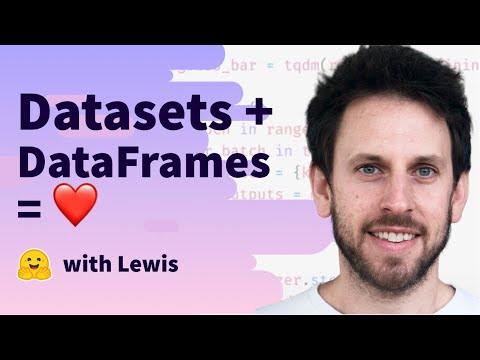

In [ ]:
YouTubeVideo('tfcY1067A5Q')

In [17]:
# 6.0 Transform pandas dataframe to hugging face dataset:

dataset = Dataset.from_pandas(data)

In [18]:
# 6.1 Look at first few rows:

dataset[:3]

{'patientid': [206461, 95260, 92703],
 'drugName': ['Valsartan', 'Guanfacine', 'Lybrel'],
 'condition': ['Left Ventricular Dysfunction', 'ADHD', 'Birth Control'],
 'review': ['It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil',
  'My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.

In [19]:
# 6.2 Look at 3 rows of column of interest:

dataset['review'][:3]

['It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil',
 'My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.',
 'I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone ge

In [21]:
# 6.3 Take a sample of dataset
#     select(range(1000)) will select top 1000 rows.
#     Hence shuffle is a must to take a sample:

drug_sample = dataset.shuffle(seed=42).select(range(1000))
drug_sample.shape  # (1000, 7)

(1000, 7)

In [ ]:
classifier(dataset['review'][:5])

[{'label': 'NEGATIVE', 'score': 0.9365567564964294},
 {'label': 'POSITIVE', 'score': 0.8964248299598694},
 {'label': 'NEGATIVE', 'score': 0.9960998296737671},
 {'label': 'NEGATIVE', 'score': 0.9308453798294067},
 {'label': 'POSITIVE', 'score': 0.9024233222007751}]

In [ ]:
# \t is the tab character in Python

data_files = {"train": pathToFolder + "drugsComTrain_raw.tsv", "test": pathToFolder +"drugsComTest_raw.tsv"}



In [ ]:
drug_dataset = load_dataset("csv", data_files=data_files, delimiter="\t")

  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
drug_sample = drug_dataset["train"].shuffle(seed=42).select(range(1000))

In [ ]:
drug_sample.shape  # (1000, 7)

(1000, 7)

In [ ]:
drug_sample[:3]

{'Unnamed: 0': [87571, 178045, 80482],
 'drugName': ['Naproxen', 'Duloxetine', 'Mobic'],
 'condition': ['Gout, Acute', 'ibromyalgia', 'Inflammatory Conditions'],
 'review': ['"like the previous person mention, I&#039;m a strong believer of aleve, it works faster for my gout than the prescription meds I take. No more going to the doctor for refills.....Aleve works!"',
  '"I have taken Cymbalta for about a year and a half for fibromyalgia pain. It is great\r\nas a pain reducer and an anti-depressant, however, the side effects outweighed \r\nany benefit I got from it. I had trouble with restlessness, being tired constantly,\r\ndizziness, dry mouth, numbness and tingling in my feet, and horrible sweating. I am\r\nbeing weaned off of it now. Went from 60 mg to 30mg and now to 15 mg. I will be\r\noff completely in about a week. The fibro pain is coming back, but I would rather deal with it than the side effects."',
  '"I have been taking Mobic for over a year with no side effects other than 

In [ ]:
drug_sample['review'][:3]

['"like the previous person mention, I&#039;m a strong believer of aleve, it works faster for my gout than the prescription meds I take. No more going to the doctor for refills.....Aleve works!"',
 '"I have taken Cymbalta for about a year and a half for fibromyalgia pain. It is great\r\nas a pain reducer and an anti-depressant, however, the side effects outweighed \r\nany benefit I got from it. I had trouble with restlessness, being tired constantly,\r\ndizziness, dry mouth, numbness and tingling in my feet, and horrible sweating. I am\r\nbeing weaned off of it now. Went from 60 mg to 30mg and now to 15 mg. I will be\r\noff completely in about a week. The fibro pain is coming back, but I would rather deal with it than the side effects."',
 '"I have been taking Mobic for over a year with no side effects other than an elevated blood pressure.  I had severe knee and ankle pain which completely went away after taking Mobic.  I attempted to stop the medication however pain returned after a 

In [ ]:
classifier("I have taken Cymbalta for about a year and a half for fibromyalgia pain. It is great\r\nas a pain reducer and an anti-depressant, however, the side effects outweighed \r\nany benefit I got from it. I had trouble with restlessness, being tired constantly,\r\ndizziness, dry mouth, numbness and tingling in my feet, and horrible sweating. I am\r\nbeing weaned off of it now. Went from 60 mg to 30mg and now to 15 mg. I will be\r\noff completely in about a week. The fibro pain is coming back, but I would rather deal with it than the side effects.")

[{'label': 'NEGATIVE', 'score': 0.9917237162590027}]

In [ ]:
# Refer: https://bobbyhadz.com/blog/python-extract-string-from-between-quotes
g = [re.findall(r'"([^"]*)"', i) for i in drug_sample['review']]

In [ ]:
resultList = [element for nestedlist in g for element in nestedlist]

In [ ]:
resultList

In [ ]:
classifier(resultList[:5])

[{'label': 'POSITIVE', 'score': 0.9654753804206848},
 {'label': 'NEGATIVE', 'score': 0.9917237162590027},
 {'label': 'NEGATIVE', 'score': 0.9979457259178162},
 {'label': 'POSITIVE', 'score': 0.9920908212661743},
 {'label': 'POSITIVE', 'score': 0.9409458041191101}]

In [ ]:
new_drug_dataset = drug_sample['review'].map(
    lambda x: x, batched=True
)

AttributeError: ignored

In [ ]:
from transformers.pipelines.pt_utils import KeyDataset
import datasets


In [ ]:
help(KeyDataset)

In [ ]:
dataset = datasets.load_dataset("imdb", name="plain_text", split="unsupervised")

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1. Subsequent calls will reuse this data.


In [ ]:
dataset.column_names

['text', 'label']

In [ ]:
dataset.to_pandas()

,text,label
0,This is just a precious little diamond. The pl...,-1
1,When I say this is my favourite film of all ti...,-1
2,I saw this movie because I am a huge fan of th...,-1
3,Being that the only foreign films I usually li...,-1
4,After seeing Point of No Return (a great movie...,-1
...,...,...
49995,License To Kill (1989) is an inanely dismal in...,-1
49996,I love watching a James Bond. It's not very in...,-1
49997,I can't decide what was the worst thing about ...,-1
49998,UGH... As an adorer of the James Bond characte...,-1


In [ ]:
# https://stackoverflow.com/q/66954682
pipe = pipeline("text-classification", truncation=True)
for out in pipe(KeyDataset(dataset, "text"  ), batch_size=8):
    print(out)